<a href="https://colab.research.google.com/github/mityamuch/ML_2023-2024/blob/main/ml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Градиентный спуск и его модификации
   - Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
   - Запрограммировать собственную реализацию классического градиентного спуска
   - Запрограммировать пайлайн тестирования алгоритма оптимизации
     - Визуализации функции и точки оптимума
     - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
     - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
   - Запрограммировать метод вычисления градиента
     - Передача функции градиента от пользователя
     - Символьное вычисление градиента (например с помощью [sympy](https://www.sympy.org/en/index.html)) (на доп балл)
     - Численная аппроксимация градиента (на доп балл)
   - Запрограммировать одну моментную модификацию и протестировать ее
   - Запрограммировать одну адаптивную модификацию и протестировать ее
   - Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

    Функция Розенброка: f(x,y)=(a−x)2+b(y−x2)2f(x,y)=(a−x)2+b(y−x2)2, обычно a=1a=1 и b=100b=100.
    Функция сферы: f(x,y)=x2+y2f(x,y)=x2+y2.
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff

# Функция Розенброка
def rosenbrock(x, y, a=1, b=100):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

# Функция сферы
def sphere(x, y):
    return x ** 2 + y ** 2

# Градиент функции Розенброка
def rosenbrock_gradient(x, y, a=1, b=100):
    dx = -2 * (a - x) - 4 * b * x * (y - x ** 2)
    dy = 2 * b * (y - x ** 2)
    return np.array([dx, dy])

# Градиент функции сферы
def sphere_gradient(x, y):
    dx = 2 * x
    dy = 2 * y
    return np.array([dx, dy])

# Классический градиентный спуск
def gradient_descent(function, grad_function, start_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path), function(x, y)

start_point = np.array([-2, 2])
path, final_value = gradient_descent(sphere, sphere_gradient, start_point)

path, final_value

(array([[-2.00000000e+00,  2.00000000e+00],
        [-1.96000000e+00,  1.96000000e+00],
        [-1.92080000e+00,  1.92080000e+00],
        ...,
        [-3.58374372e-05,  3.58374372e-05],
        [-3.51206885e-05,  3.51206885e-05],
        [-3.44182747e-05,  3.44182747e-05]]),
 2.466925519650886e-09)

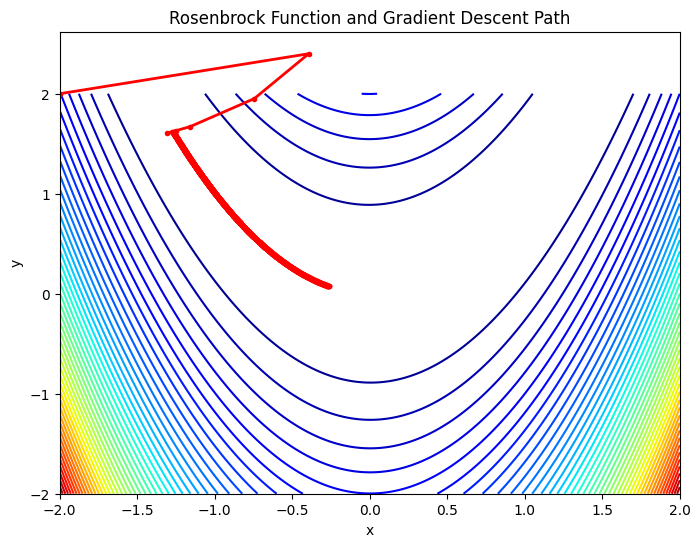

In [2]:
# Изменение параметров для стабилизации градиентного спуска
learning_rate = 0.001  # Уменьшение шага обучения
start_point = np.array([-2, 2])  # Начальная точка
path, final_value = gradient_descent(rosenbrock, rosenbrock_gradient, start_point, learning_rate=learning_rate)

path[-1], final_value
def plot_gradient_descent(function, path, function_name="Function"):
    # Создание сетки точек для визуализации функции
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')
    plt.plot(path[:, 0], path[:, 1], marker='o', color='red', markersize=3, linestyle='-', linewidth=2)
    plt.title(f"{function_name} and Gradient Descent Path")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


plot_gradient_descent(rosenbrock, path, "Rosenbrock Function")

Моментная модификация градиентного спуска: Например, метод градиентного спуска с моментом.



In [3]:
def gradient_descent_momentum(grad_function, start_point, learning_rate=0.01, momentum=0.9, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point
    velocity = np.zeros_like(start_point)

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        velocity = momentum * velocity + learning_rate * grad
        new_x, new_y = np.array([x, y]) - velocity
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Адаптивная модификация: Метод Adam

In [4]:
def adam_optimization(grad_function, start_point, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point
    m, v = np.zeros_like(start_point), np.zeros_like(start_point)
    t = 0

    for _ in range(max_iterations):
        t += 1
        grad = grad_function(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        new_x, new_y = np.array([x, y]) - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Метод эволюции темпа обучения и выбора начального приближения

Мы можем использовать простой метод адаптации шага обучения, например уменьшение его вдвое, если нет улучшения.

In [5]:
def adaptive_learning_rate(grad_function, start_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6, improvement_threshold=0.1):
    path = [start_point]
    x, y = start_point
    learning_rate = learning_rate
    best_value = float('inf')

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        new_value = rosenbrock(new_x, new_y)

        if new_value < best_value - tolerance * improvement_threshold:
            best_value = new_value
        else:
            learning_rate /= 2  # Уменьшение шага обучения

        path.append((new_x, new_y))
        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

In [6]:
def visualize_optimization_results(function, optimization_function, grad_function, start_point, title, learning_rate=0.01, **kwargs):
    path = optimization_function(grad_function, start_point, learning_rate=learning_rate, **kwargs)
    plot_gradient_descent(function, path, title)

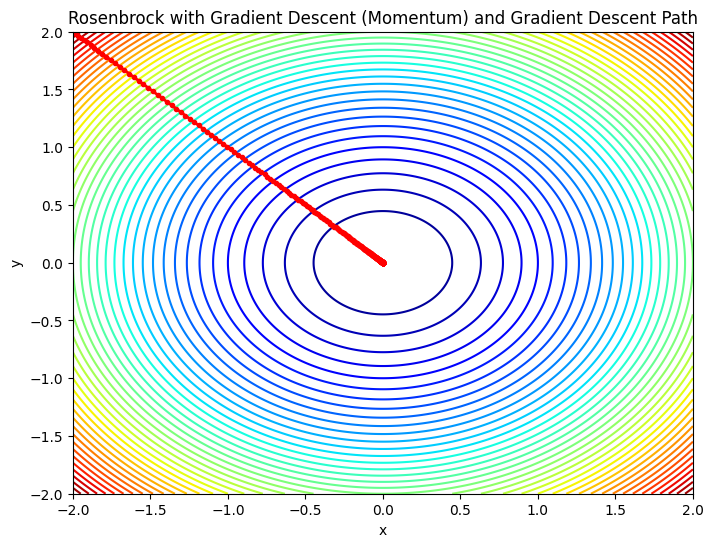

In [7]:
start_point = np.array([-2, 2])  # Начальная точка
visualize_optimization_results(sphere, gradient_descent_momentum, sphere_gradient, start_point, "Rosenbrock with Gradient Descent (Momentum)", learning_rate=0.001, momentum=0.9)

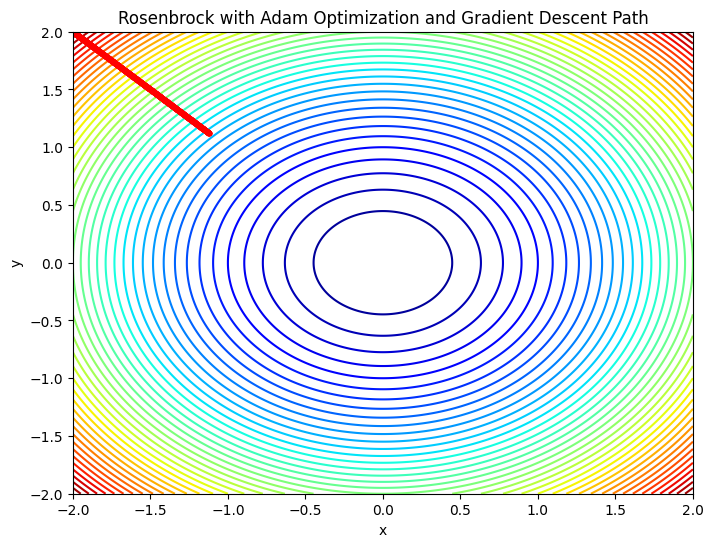

In [8]:
start_point = np.array([-2, 2])  # Начальная точка
visualize_optimization_results(sphere, adam_optimization, sphere_gradient, start_point, "Rosenbrock with Adam Optimization", learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)

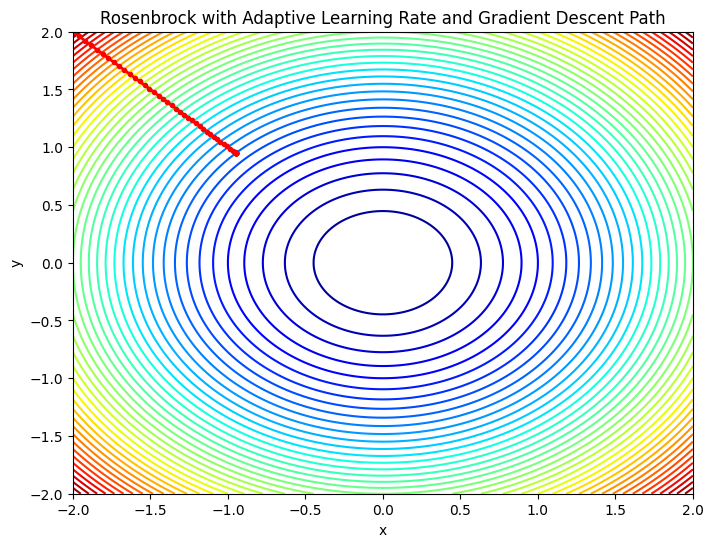

In [9]:
start_point = np.array([-2, 2])  # Начальная точка
visualize_optimization_results(sphere, adaptive_learning_rate, sphere_gradient, start_point, "Rosenbrock with Adaptive Learning Rate", learning_rate=0.01, improvement_threshold=0.1)